In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

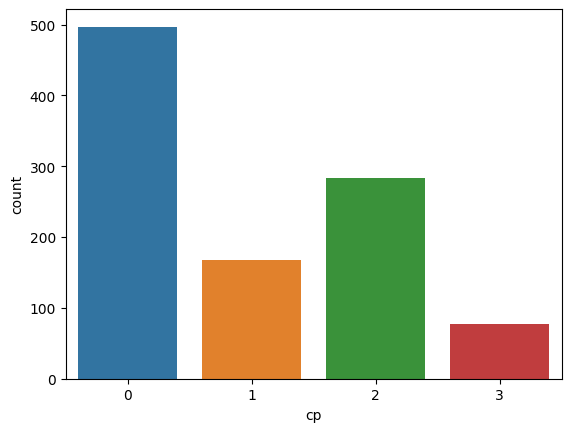

In [6]:
sns.countplot(data=df,x='cp')
plt.show()

0 – **Typical angina** (chest pain related to decreased blood supply to the heart)

1 – **Atypical angina** (chest pain not directly related to heart)

2 – **Non-anginal pain** (not heart-related)

3 – **Asymptomatic** (no chest pain but disease may exist)

From the countplot,we can clearly see dataset covers majority of typical angina cases

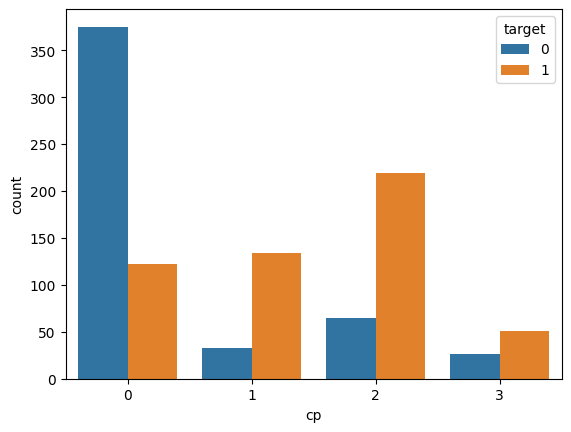

In [7]:
sns.countplot(x='cp',data=df,hue='target')
plt.show()

Patients with type 2 chest pain show higher proportion of heart diseases cases.As a result, we can assume, chest pain typically not related to heart may still indicates underlying heart problems.In contrast, doctors should not be soley rely on directly associated chest pain for diagonosing heart disease.

<Axes: xlabel='fbs', ylabel='count'>

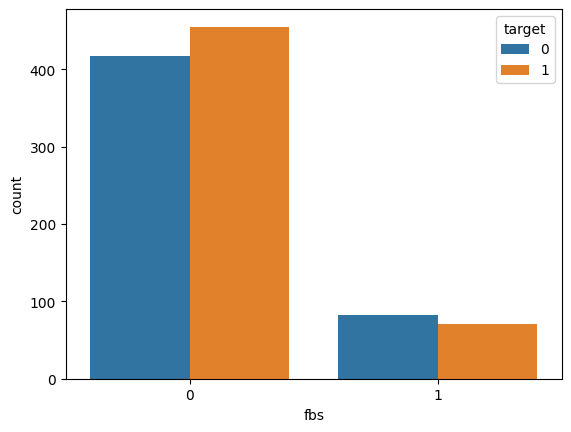

In [8]:
sns.countplot(x='fbs',hue='target',data=df)


If FBS is high (e.g., >120 mg/dL in your dataset), it means blood sugar is elevated even without eating, which can indicate insulin problems or diabetes.

If FBS is normal or low, it means body is regulating blood sugar properly during fasting.

Patients with normal fasting blood sugar shows higher proportion of heart problems,whereas proportion of patient with higher fasting blood sugar indicates less possibility of heart issue.

The dataset is imbalanced for fbs. There are more cases of patient with fbs-0 than fbs-1.However, it is rare to find patients with fbs-1, since fewer people have higher fasting blood sugar compared to normal.

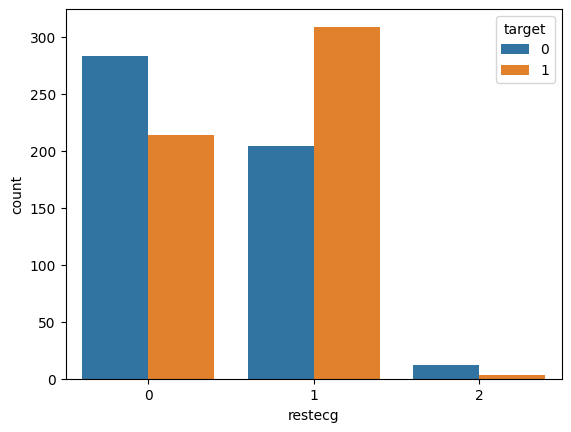

In [9]:
sns.countplot(x='restecg',hue='target',data=df)
plt.show()


0 – Normal → Heart looks healthy.

1 – ST-T wave abnormality → Heart is under stress or not getting enough oxygen.

2 – Left ventricular hypertrophy → Heart muscle is thicker than normal, meaning the heart is working harder than it should.

The restecg feature is a strong predictor of heart disease.

An restecg value of 1 (ST-T wave abnormality) is strongly associated with the presence of heart disease (target=1).

An restecg value of 0 (Normal/Mild Abnormality) is more associated with the absence of heart disease (target=0).

<Axes: xlabel='exang', ylabel='count'>

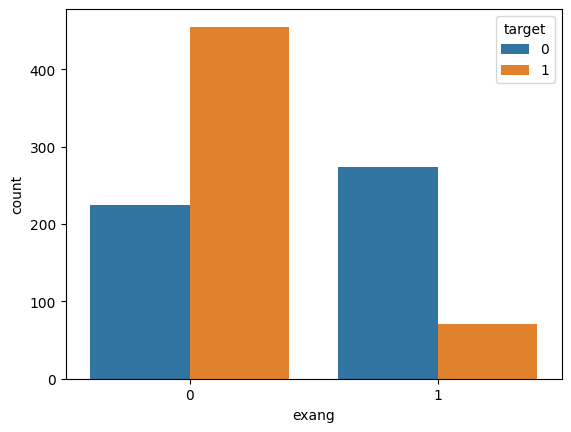

In [10]:
sns.countplot(x='exang', hue='target', data=df)


**Exercise Induced Angina**

1->	The patient experiences chest pain (angina) during exercise or physical exertion.

0->	The patient does not experience exercise-induced chest pain.

The figure strongly indicates that patients who do not experience chest pain during exercise have higher rate of developing heart disease.This conclude that absence of chest pain during physical exertion doesnt necessary imply patient is free from heart disease. 



<Axes: xlabel='ca', ylabel='count'>

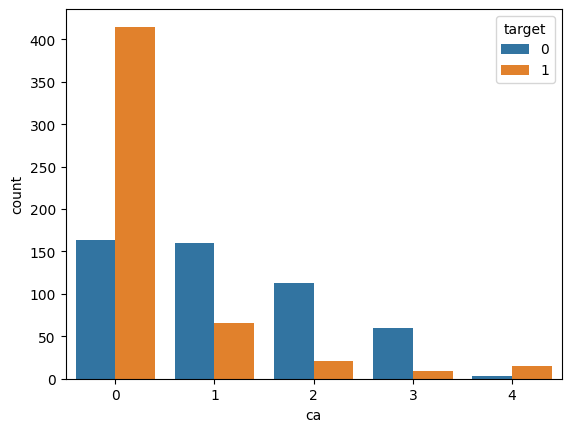

In [11]:
sns.countplot(x='ca',hue='target',data=df)


ca - number of major vessels (0–3) colored by fluoroscopy

ca counts how many of the major arteries (left anterior descending, circumflex, right coronary artery, etc.) have significant narrowing or blockage.

The higher the ca value, the more severe the coronary artery disease, because multiple vessels are affected.

#### The figure shows even with zero ca, patients have higher ratio of developing heart diseases. ####

<Axes: xlabel='thal', ylabel='count'>

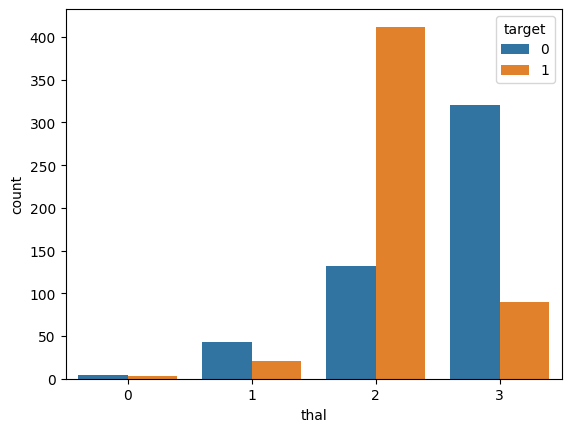

In [12]:
sns.countplot(x='thal',hue='target',data=df)

**1 → healthy blood flow**

**2 → part of heart has permanent damage**

**3 → part of heart is temporarily affected under stress**


**0 → missing or unknown information**

thal-2 is a strong predictor for heart disease as it contain more cases compared to other types

In constrast,thal-3 is strong indicate normal heart condition, with fewer cases of heart issues.

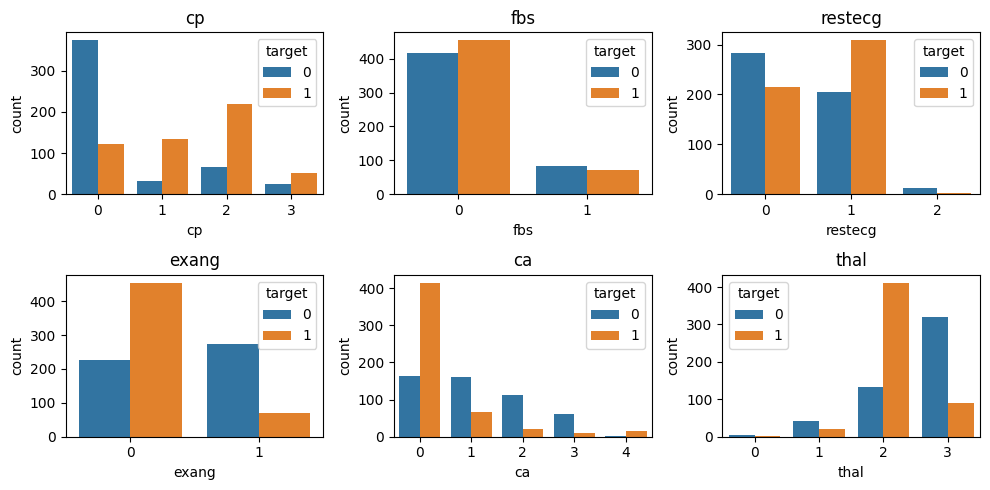

In [26]:
cat_data=['cp','fbs','restecg','exang','ca','thal']
plt.figure(figsize=(10,5))
for i,feature in enumerate(cat_data):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[feature],hue=df['target'])
    plt.title(feature)
plt.tight_layout()
plt.show()

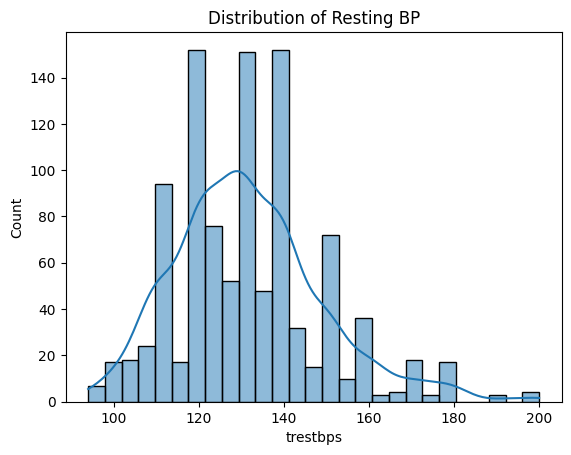

In [31]:
sns.histplot(df['trestbps'], kde=True)
plt.title('Distribution of Resting BP')
plt.show()

<Axes: xlabel='chol', ylabel='Count'>

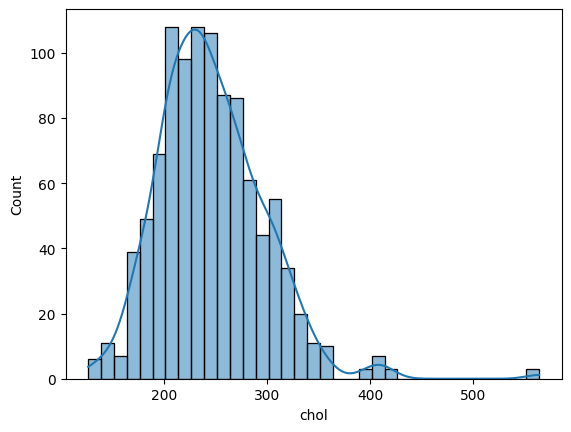

In [33]:
sns.histplot(df['chol'],kde=True)

This histogram illustrates the distribution of **serum cholesterol (chol)** levels in the dataset. The data is heavily concentrated between **200 and 300 mg/dL**, peaking around **250 mg/dL**. This indicates that a large portion of the individuals in the sample already have cholesterol levels considered high or borderline high, which is typical for a dataset used to predict heart disease. While the core of the distribution is bell-shaped, the presence of distinct, small peaks far to the right (around 400 and 550 mg/dL) shows that the dataset also includes a few patients with **extremely high and medically concerning cholesterol levels**. Overall, the high average and wide range of cholesterol values confirm this feature's relevance as a critical **risk factor** for heart disease prediction.

<Axes: xlabel='thalach', ylabel='Count'>

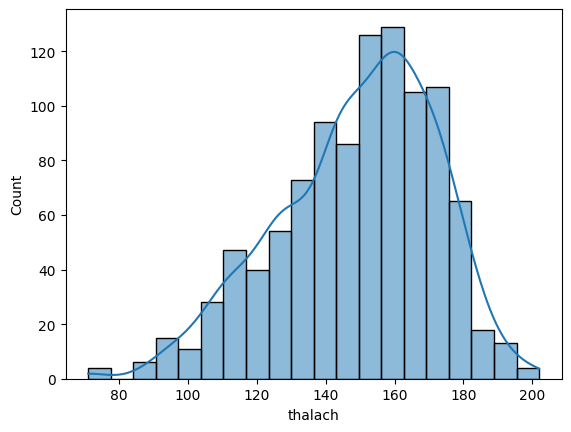

In [42]:
sns.histplot(df['thalach'],kde=True)

**Most people have normal/high max heart rates, but a small number have low rates, which signals higher risk for heart disease.**

<Axes: xlabel='age', ylabel='Count'>

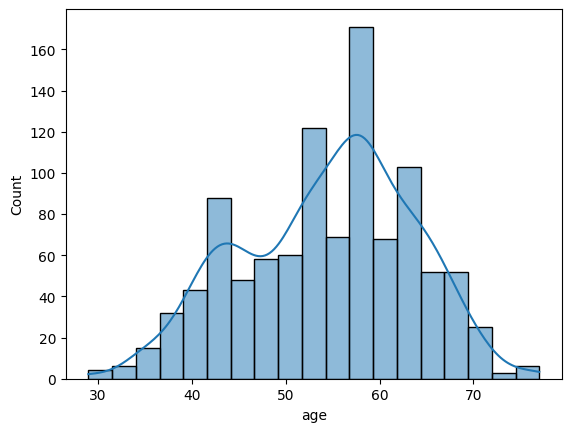

In [44]:
sns.histplot(df['age'],kde=True)


This histogram displays the distribution of Age in the heart disease prediction dataset.

Observations
Age Range: The ages in the dataset span from around 29 up to 77, though the vast majority of individuals are between 40 and 70.

Most Common Ages (Mode): The distribution is clearly bimodal (two main peaks). The most prominent peak is around 58 to 60 years old, and a secondary, smaller peak occurs around 42 to 45 years old.

Central Tendency: The majority of the data is concentrated in the middle-aged to older adult groups, primarily between 50 and 65.

Shape: The overall shape is skewed, with the high counts concentrated towards the center-right of the graph.

<Axes: xlabel='age', ylabel='thalach'>

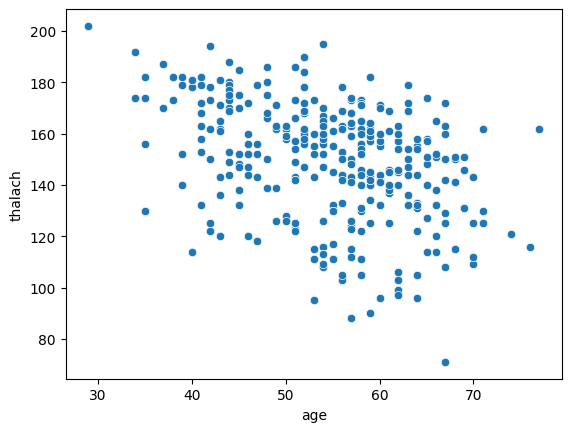

In [45]:
sns.scatterplot(x='age',y='thalach',data=df)

<Axes: xlabel='chol', ylabel='trestbps'>

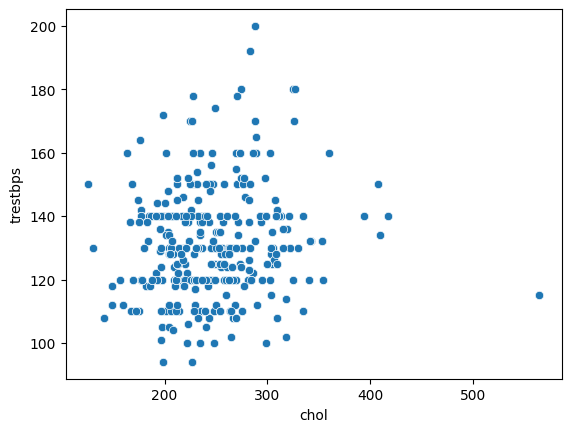

In [47]:
sns.scatterplot(x='chol',y='trestbps',data=df)

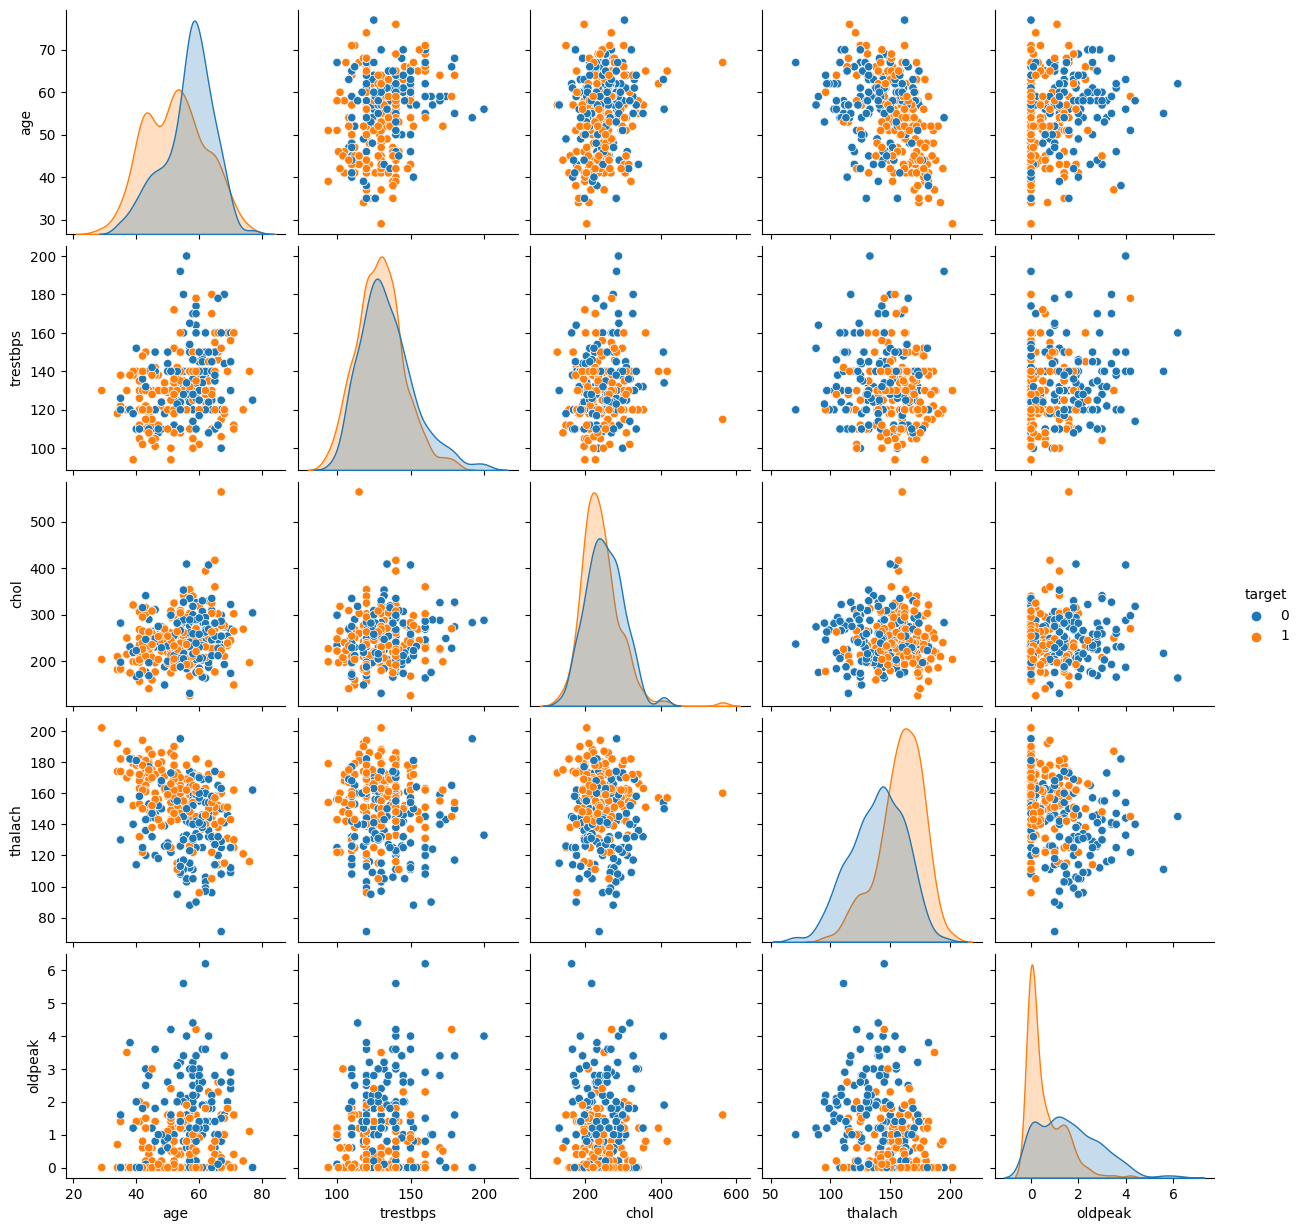

In [49]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Pairplot with target as hue
sns.pairplot(df[num_features + ['target']], hue='target', diag_kind='kde')
plt.show()